# HW02: Tokenization

Remember that these homework work as a completion grade. **You can skip one section without losing credit.**

In [ ]:
!wget https://raw.githubusercontent.com/mhjabreel/CharCnn_Keras/master/data/ag_news_csv/train.csv

--2024-03-06 13:59:58--  https://raw.githubusercontent.com/mhjabreel/CharCnn_Keras/master/data/ag_news_csv/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29470338 (28M) [text/plain]
Saving to: ‘train.csv’

train.csv           100%[===================>]  28.10M  --.-KB/s    in 0.1s    

2024-03-06 14:00:01 (227 MB/s) - ‘train.csv’ saved [29470338/29470338]



In [ ]:
#Import the AG news dataset (same as hw01)
#Download them from here
#!wget https://raw.githubusercontent.com/mhjabreel/CharCnn_Keras/master/data/ag_news_csv/train.csv

import pandas as pd
import nltk
df = pd.read_csv('train.csv')

df.columns = ["label", "title", "lead"]
label_map = {1:"world", 2:"sport", 3:"business", 4:"sci/tech"}
def replace_label(x):
	return label_map[x]
df["label"] = df["label"].apply(replace_label)
df["text"] = df["title"] + " " + df["lead"]
df.head()
import spacy
dfs = df.sample(50)
nlp = spacy.load('en_core_web_sm')

##TODO use spacy to split the documents in the sampled dataframe (dfs) in sentences and tokens
##TODO print the first sentence of the first document in your sample

## Preprocess Text

In [ ]:
!pip install spacy
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 35.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import spacy
dfs = df.sample(50)
nlp = spacy.load('en_core_web_sm')

def split_into_sentences_and_tokens(text):
    doc = nlp(text)
    sentences = [sent.text for sent in doc.sents]
    tokens = [token.text for token in doc]
    return sentences, tokens

##TODO use spacy to split the documents in the sampled dataframe (dfs) in sentences and tokens
dfs['sentences'], dfs['tokens'] = zip(*dfs['text'].apply(split_into_sentences_and_tokens))

##TODO print the first sentence of the first document in your sample
print(dfs['sentences'].iloc[0][0])
print(dfs['sentences'].iloc[0][1])


dfs



U.K. ITunes Prices Questioned A watchdog group asks a consumer-protection agency to look into the higher price of songs on Apple's British version of its iTunes service.
Wendy M. Grossman reports from London.


,label,title,lead,text,sentences,tokens
30686,sci/tech,U.K. ITunes Prices Questioned,A watchdog group asks a consumer-protection ag...,U.K. ITunes Prices Questioned A watchdog group...,[U.K. ITunes Prices Questioned A watchdog grou...,"[U.K., ITunes, Prices, Questioned, A, watchdog..."
13856,world,"8 Dead, 54 Injured in French Auto Pileup",At least eight people have been killed and at ...,"8 Dead, 54 Injured in French Auto Pileup At le...","[8 Dead, 54 Injured in French Auto Pileup At l...","[8, Dead, ,, 54, Injured, in, French, Auto, Pi..."
88600,world,Whistleblower #39;under house arrest #39;,FORMER Israeli nuclear technician Mordechai Va...,Whistleblower #39;under house arrest #39; FOR...,[Whistleblower #39;under house arrest #39; FO...,"[Whistleblower, , #, 39;under, house, arrest,..."
32869,sport,"Rams storm back, still lose to Vick, Falcons",The St. Louis Rams had spent the better part o...,"Rams storm back, still lose to Vick, Falcons T...","[Rams storm back, still lose to Vick, Falcons ...","[Rams, storm, back, ,, still, lose, to, Vick, ..."
68626,world,Dollar in the doldrums amid economic jitters (...,AFP - The dollar hovered close to eight-month ...,Dollar in the doldrums amid economic jitters (...,[Dollar in the doldrums amid economic jitters ...,"[Dollar, in, the, doldrums, amid, economic, ji..."
100067,world,Secure Iraqi borders endorsed; concern on US t...,"SHARM EL SHEIK, Egypt -- In the first regional...",Secure Iraqi borders endorsed; concern on US t...,[Secure Iraqi borders endorsed; concern on US ...,"[Secure, Iraqi, borders, endorsed, ;, concern,..."
65491,sport,Bucs owner Glazer moves closer to possible tak...,American businessman Malcolm Glazer has moved ...,Bucs owner Glazer moves closer to possible tak...,[Bucs owner Glazer moves closer to possible ta...,"[Bucs, owner, Glazer, moves, closer, to, possi..."
290,sci/tech,Olympics Could Call Out the Couch Potatoes,As the 2004 Summer Olympics officially get und...,Olympics Could Call Out the Couch Potatoes As ...,[Olympics Could Call Out the Couch Potatoes As...,"[Olympics, Could, Call, Out, the, Couch, Potat..."
97462,sport,Diminishing Returns,Delaware State scores on a 73-yard punt return...,Diminishing Returns Delaware State scores on a...,[Diminishing Returns Delaware State scores on ...,"[Diminishing, Returns, Delaware, State, scores..."
2565,sci/tech,Ford scraps Oracle-based purchasing system,Car giant Ford is reportedly abandoning a \$20...,Ford scraps Oracle-based purchasing system Car...,[Ford scraps Oracle-based purchasing system Ca...,"[Ford, scraps, Oracle, -, based, purchasing, s..."


In [ ]:
##TODO create a new column with tokens in lowercase (x.lower()), without punctuation tokens (x.is_punct), stopwords (x.is_stop), and digits (x.is_digit)

dfs['doc'] = dfs['text'].apply(nlp)

def tokenize(x):
    # lemmatize and lowercase without stopwords, punctuation and numbers
    res = []
    for sent in x.sents:
      res.append([w.lemma_.lower() for w in sent if not w.is_stop and not w.is_punct and not w.is_digit])
    return res

def tokenize_dep(x):
    res = []
    for sent in x.sents:
      res.append([w.dep_ for w in sent if not w.is_stop and not w.is_punct and not w.is_digit])
    return res

dfs['cleaned_lemma'] = dfs['doc'].apply(tokenize)
dfs['cleaned_dep'] = dfs['doc'].apply(tokenize_dep)

dfs


,label,title,lead,text,sentences,tokens,doc,cleaned_lemma,cleaned_dep
30686,sci/tech,U.K. ITunes Prices Questioned,A watchdog group asks a consumer-protection ag...,U.K. ITunes Prices Questioned A watchdog group...,[U.K. ITunes Prices Questioned A watchdog grou...,"[U.K., ITunes, Prices, Questioned, A, watchdog...","(U.K., ITunes, Prices, Questioned, A, watchdog...","[[u.k., itunes, prices, question, watchdog, gr...","[[compound, compound, nsubj, ROOT, compound, n..."
13856,world,"8 Dead, 54 Injured in French Auto Pileup",At least eight people have been killed and at ...,"8 Dead, 54 Injured in French Auto Pileup At le...","[8 Dead, 54 Injured in French Auto Pileup At l...","[8, Dead, ,, 54, Injured, in, French, Auto, Pi...","(8, Dead, ,, 54, Injured, in, French, Auto, Pi...","[[dead, injure, french, auto, pileup, people, ...","[[nsubjpass, acl, compound, compound, pobj, ns..."
88600,world,Whistleblower #39;under house arrest #39;,FORMER Israeli nuclear technician Mordechai Va...,Whistleblower #39;under house arrest #39; FOR...,[Whistleblower #39;under house arrest #39; FO...,"[Whistleblower, , #, 39;under, house, arrest,...","(Whistleblower, , #, 39;under, house, arrest,...","[[whistleblower, , 39;under, house, arrest, i...","[[nmod, dep, dobj, compound, ccomp, amod, amod..."
32869,sport,"Rams storm back, still lose to Vick, Falcons",The St. Louis Rams had spent the better part o...,"Rams storm back, still lose to Vick, Falcons T...","[Rams storm back, still lose to Vick, Falcons ...","[Rams, storm, back, ,, still, lose, to, Vick, ...","(Rams, storm, back, ,, still, lose, to, Vick, ...","[[ram, storm, lose, vick, falcons, st., louis,...","[[nsubj, ROOT, dep, pobj, appos, compound, com..."
68626,world,Dollar in the doldrums amid economic jitters (...,AFP - The dollar hovered close to eight-month ...,Dollar in the doldrums amid economic jitters (...,[Dollar in the doldrums amid economic jitters ...,"[Dollar, in, the, doldrums, amid, economic, ji...","(Dollar, in, the, doldrums, amid, economic, ji...","[[dollar, doldrum, amid, economic, jitter, afp...","[[ROOT, pobj, prep, amod, pobj, appos, appos],..."
100067,world,Secure Iraqi borders endorsed; concern on US t...,"SHARM EL SHEIK, Egypt -- In the first regional...",Secure Iraqi borders endorsed; concern on US t...,[Secure Iraqi borders endorsed; concern on US ...,"[Secure, Iraqi, borders, endorsed, ;, concern,...","(Secure, Iraqi, borders, endorsed, ;, concern,...","[[secure, iraqi, border, endorse, concern, tro...","[[amod, amod, nsubj, ROOT, dobj, compound, com..."
65491,sport,Bucs owner Glazer moves closer to possible tak...,American businessman Malcolm Glazer has moved ...,Bucs owner Glazer moves closer to possible tak...,[Bucs owner Glazer moves closer to possible ta...,"[Bucs, owner, Glazer, moves, closer, to, possi...","(Bucs, owner, Glazer, moves, closer, to, possi...","[[bucs, owner, glazer, move, close, possible, ...","[[compound, compound, nsubj, ROOT, advmod, amo..."
290,sci/tech,Olympics Could Call Out the Couch Potatoes,As the 2004 Summer Olympics officially get und...,Olympics Could Call Out the Couch Potatoes As ...,[Olympics Could Call Out the Couch Potatoes As...,"[Olympics, Could, Call, Out, the, Couch, Potat...","(Olympics, Could, Call, Out, the, Couch, Potat...","[[olympic, couch, potatoes, summer, olympics, ...","[[nsubj, compound, dobj, compound, nsubj, advm..."
97462,sport,Diminishing Returns,Delaware State scores on a 73-yard punt return...,Diminishing Returns Delaware State scores on a...,[Diminishing Returns Delaware State scores on ...,"[Diminishing, Returns, Delaware, State, scores...","(Diminishing, Returns, Delaware, State, scores...","[[diminish, return, delaware, state, score, ya...","[[ROOT, compound, compound, compound, dobj, co..."
2565,sci/tech,Ford scraps Oracle-based purchasing system,Car giant Ford is reportedly abandoning a \$20...,Ford scraps Oracle-based purchasing system Car...,[Ford scraps Oracle-based purchasing system Ca...,"[Ford, 

In [ ]:
print(dfs['cleaned_lemma'].iloc[0][0])
print(dfs['cleaned_dep'].iloc[0][0])


['u.k.', 'itunes', 'prices', 'question', 'watchdog', 'group', 'ask', 'consumer', 'protection', 'agency', 'look', 'high', 'price', 'song', 'apple', 'british', 'version', 'itunes', 'service']
['compound', 'compound', 'nsubj', 'ROOT', 'compound', 'nsubj', 'ccomp', 'compound', 'compound', 'dobj', 'xcomp', 'amod', 'pobj', 'pobj', 'poss', 'amod', 'pobj', 'compound', 'pobj']


### Named Entities

Let's compute the ratio of named entities starting with a capital letter, e.g. if we have "University of Chicago" as a NE, "University" and "Chicago" are capitalized, "of" is not, thus the ratio is 2/3.

In [ ]:
##TODO print the ratio of tokens being part of a named entity span starting with a capital letter (doc.ents)
def calculate_ratio(doc):
    total_tokens = len(doc)
    named_entity_tokens = 0
    for ent in doc.ents:
        if ent[0].is_title:  # Check if the first token starts with a capital
            named_entity_tokens += len(ent)

    return named_entity_tokens / total_tokens if total_tokens > 0 else 0

# Calculate ratios for each document
dfs['named_entity_ratio'] = dfs['doc'].apply(calculate_ratio)
dfs

,label,title,lead,text,sentences,tokens,doc,cleaned_lemma,cleaned_dep,named_entity_ratio
30686,sci/tech,U.K. ITunes Prices Questioned,A watchdog group asks a consumer-protection ag...,U.K. ITunes Prices Questioned A watchdog group...,[U.K. ITunes Prices Questioned A watchdog grou...,"[U.K., ITunes, Prices, Questioned, A, watchdog...","(U.K., ITunes, Prices, Questioned, A, watchdog...","[[u.k., itunes, prices, question, watchdog, gr...","[[compound, compound, nsubj, ROOT, compound, n...",0.184211
13856,world,"8 Dead, 54 Injured in French Auto Pileup",At least eight people have been killed and at ...,"8 Dead, 54 Injured in French Auto Pileup At le...","[8 Dead, 54 Injured in French Auto Pileup At l...","[8, Dead, ,, 54, Injured, in, French, Auto, Pi...","(8, Dead, ,, 54, Injured, in, French, Auto, Pi...","[[dead, injure, french, auto, pileup, people, ...","[[nsubjpass, acl, compound, compound, pobj, ns...",0.117647
88600,world,Whistleblower #39;under house arrest #39;,FORMER Israeli nuclear technician Mordechai Va...,Whistleblower #39;under house arrest #39; FOR...,[Whistleblower #39;under house arrest #39; FO...,"[Whistleblower, , #, 39;under, house, arrest,...","(Whistleblower, , #, 39;under, house, arrest,...","[[whistleblower, , 39;under, house, arrest, i...","[[nmod, dep, dobj, compound, ccomp, amod, amod...",0.076923
32869,sport,"Rams storm back, still lose to Vick, Falcons",The St. Louis Rams had spent the better part o...,"Rams storm back, still lose to Vick, Falcons T...","[Rams storm back, still lose to Vick, Falcons ...","[Rams, storm, back, ,, still, lose, to, Vick, ...","(Rams, storm, back, ,, still, lose, to, Vick, ...","[[ram, storm, lose, vick, falcons, st., louis,...","[[nsubj, ROOT, dep, pobj, appos, compound, com...",0.229167
68626,world,Dollar in the doldrums amid economic jitters (...,AFP - The dollar hovered close to eight-month ...,Dollar in the doldrums amid economic jitters (...,[Dollar in the doldrums amid economic jitters ...,"[Dollar, in, the, doldrums, amid, economic, ji...","(Dollar, in, the, doldrums, amid, economic, ji...","[[dollar, doldrum, amid, economic, jitter, afp...","[[ROOT, pobj, prep, amod, pobj, appos, appos],...",0.000000
100067,world,Secure Iraqi borders endorsed; concern on US t...,"SHARM EL SHEIK, Egypt -- In the first regional...",Secure Iraqi borders endorsed; concern on US t...,[Secure Iraqi borders endorsed; concern on US ...,"[Secure, Iraqi, borders, endorsed, ;, concern,...","(Secure, Iraqi, borders, endorsed, ;, concern,...","[[secure, iraqi, border, endorse, concern, tro...","[[amod, amod, nsubj, ROOT, dobj, compound, com...",0.052632
65491,sport,Bucs owner Glazer moves closer to possible tak...,American businessman Malcolm Glazer has moved ...,Bucs owner Glazer moves closer to possible tak...,[Bucs owner Glazer moves closer to possible ta...,"[Bucs, owner, Glazer, moves, closer, to, possi...","(Bucs, owner, Glazer, moves, closer, to, possi...","[[bucs, owner, glazer, move, close, possible, ...","[[compound, compound, nsubj, ROOT, advmod, amo...",0.276596
290,sci/tech,Olympics Could Call Out the Couch Potatoes,As the 2004 Summer Olympics officially get und...,Olympics Could Call Out the Couch Potatoes As ...,[Olympics Could Call Out the Couch Potatoes As...,"[Olympics, Could, Call, Out, the, Couch, Potat...","(Olympics, Could, Call, Out, the, Couch, Potat...","[[olympic, couch, potatoes, summer, olympics, ...","[[nsubj, compound, dobj, compound, nsubj, advm...",0.063492
97462,sport,Diminishing Returns,Delaware State scores on a 73-yard punt return...,Diminishing Returns Delaware State scores on a...,[Diminishing Returns Delaware State scores on ...,"[Diminishing, Returns, Delaware, State, scores...","(Diminishing, Returns, Delaware, State, scores...","[[diminish, return, delaware, state, score, ya...","[[ROOT, compound, compound, compound, dobj, co...",0.093750
2565,sci/tech,Ford scraps Oracle-based purchasing system,Car giant Ford is reportedly abandoning a \$20...,Ford scr

In [ ]:
##TODO print the ratio of capitalized tokens not being part of a named entity span (have no token.ent_type_)
# e.g. "The dog barks" = 1/3; 3 tokens, only "The" is capitalized
def calculate_ratio(doc):
    total_tokens = len(doc)
    capitalized_non_entity_tokens = 0
    for token in doc:
        if token.is_title and not token.ent_type_:
            capitalized_non_entity_tokens += 1

    return capitalized_non_entity_tokens / total_tokens if total_tokens > 0 else 0

# Calculate ratios for each document
dfs['capitalized_non_entity_ratio'] = dfs['doc'].apply(calculate_ratio)
dfs

,label,title,lead,text,sentences,tokens,clean_tokens,doc,cleaned_tokens,cleaned,cleaned_lemma,cleaned_dep,named_entity_ratio,capitalized_non_entity_ratio
33017,business,Samsung sees chip sales slowing,Growth in chip sales is set to halve next year...,Samsung sees chip sales slowing Growth in chip...,[Samsung sees chip sales slowing Growth in chi...,"[Samsung, sees, chip, sales, slowing, Growth, ...","[14454550138149937923, 5827844717026459123, 46...","(Samsung, sees, chip, sales, slowing, Growth, ...","[samsung, see, chip, sale, slow, growth, chip,...","[[samsung, see, chip, sale, slow, growth, chip...","[[samsung, see, chip, sale, slow, growth, chip...","[[nsubj, ccomp, compound, nsubjpass, acl, dobj...",0.050847,0.033898
94743,sci/tech,"Sun to set Solaris free, after a fashion",Sun Microsystems plans to announce a free vers...,"Sun to set Solaris free, after a fashion Sun M...","[Sun to set Solaris free, after a fashion Sun ...","[Sun, to, set, Solaris, free, ,, after, a, fas...","[13300848193037734645, 11268780503345276587, 3...","(Sun, to, set, Solaris, free, ,, after, a, fas...","[sun, set, solaris, free, fashion, sun, micros...","[[sun, set, solaris, free, fashion, sun, micro...","[[sun, set, solaris, free, fashion, sun, micro...","[[nsubj, advcl, dobj, advmod, nsubj, compound,...",0.189189,0.027027
18864,sport,MSU counting on Dortch during homecoming at Ru...,Tyrell Dortch #39;s homecoming will be triumph...,MSU counting on Dortch during homecoming at Ru...,[MSU counting on Dortch during homecoming at R...,"[MSU, counting, on, Dortch, during, homecoming...","[3377389906530430587, 12094118183538440820, 13...","(MSU, counting, on, Dortch, during, homecoming...","[msu, count, dortch, homecoming, rutgers, tyre...","[[msu, count, dortch, homecoming, rutgers, tyr...","[[msu, count, dortch, homecoming, rutgers, tyr...","[[nsubj, csubj, pobj, pobj, compound, compound...",0.159091,0.022727
102535,world,"I helped free hostages, says ex-BBC cameraman",A Kabul-based British hotelier and former BBC ...,"I helped free hostages, says ex-BBC cameraman ...","[I helped free hostages, says ex-BBC cameraman...","[I, helped, free, hostages, ,, says, ex, -, BB...","[13367314321634499193, 17712913731469760764, 1...","(I, helped, free, hostages, ,, says, ex, -, BB...","[help, free, hostage, say, ex, bbc, cameraman,...","[[help, free, hostage, say, ex, bbc, cameraman...","[[help, free, hostage, say, ex, bbc, cameraman...","[[ccomp, amod, dobj, parataxis, compound, amod...",0.063830,0.042553
79702,business,OVITZ: I WANT MY PROPS,Michael Ovitz hopes getting his day in court f...,OVITZ: I WANT MY PROPS Michael Ovitz hopes get...,[OVITZ: I WANT MY PROPS Michael Ovitz hopes ge...,"[OVITZ, :, I, WANT, MY, PROPS, Michael, Ovitz,...","[1183172514593790143, 7597692042947428029, 916...","(OVITZ, :, I, WANT, MY, PROPS, Michael, Ovitz,...","[ovitz, want, props, michael, ovitz, hope, get...","[[ovitz, want, props, michael, ovitz, hope, ge...","[[ovitz, want, props, michael, ovitz, hope, ge...","[[dep, ROOT, compound, compound, nsubj, ccomp,...",0.111111,0.027778
32361,world,Hu becomes China military chief,Jiang Zemin has given up the top job in China ...,Hu becomes China military chief Jiang Zemin ha...,[Hu becomes China military chief Jiang Zemin h...,"[Hu, becomes, China, military, chief, Jiang, Z...","[4515088451898819699, 10603582739829208913, 15...","(Hu, becomes, China, military, chief, Jiang, Z...","[hu, china, military, chief, jiang, zemin, giv...","[[hu, china, military, chief, jiang, zemin, gi...","[[hu, china, military, chief, jiang, zemin, gi...","[[nsubj, nmod, amod, compound, compound, nsubj...",0.225000,0.000000
81880,business,United Airlines Seeks Staff Concessions (Reuters),Reuters - United Airlines is expected to ask a...,United Airlines Seeks Staff Concessions (Reute...,[United Airlines Seeks Staff Concessions (Reut...,"[United, Airlines, Seeks, Staff, Concessions, ...","[16933990426988047072, 12153614430964297430, 8...","(United, Airline

In [ ]:
##TODO print the ratio of capitalized tokens not being a named entity and not being the first token in a sentence
# e.g. "The dog barks" = 0; 3 tokens, "The" is capitalized but the starting token of a sentence, no other tokens are capitalized.
def calculate_ratio(doc):
    total_tokens = len(doc)
    capitalized_non_entity_tokens = 0
    for token in doc[1:]:
        if token.is_title and not token.ent_type_:
            capitalized_non_entity_tokens += 1

    return capitalized_non_entity_tokens / total_tokens if total_tokens > 0 else 0

# Calculate ratios for each document
dfs['capitalized_non_entity_non_initial_ratio'] = dfs['doc'].apply(calculate_ratio)

In [ ]:
dfs

,label,title,lead,text,sentences,tokens,clean_tokens,doc,cleaned_tokens,cleaned,cleaned_lemma,cleaned_dep,named_entity_ratio,capitalized_non_entity_ratio,capitalized_non_entity_non_initial_ratio
33017,business,Samsung sees chip sales slowing,Growth in chip sales is set to halve next year...,Samsung sees chip sales slowing Growth in chip...,[Samsung sees chip sales slowing Growth in chi...,"[Samsung, sees, chip, sales, slowing, Growth, ...","[14454550138149937923, 5827844717026459123, 46...","(Samsung, sees, chip, sales, slowing, Growth, ...","[samsung, see, chip, sale, slow, growth, chip,...","[[samsung, see, chip, sale, slow, growth, chip...","[[samsung, see, chip, sale, slow, growth, chip...","[[nsubj, ccomp, compound, nsubjpass, acl, dobj...",0.050847,0.033898,0.033898
94743,sci/tech,"Sun to set Solaris free, after a fashion",Sun Microsystems plans to announce a free vers...,"Sun to set Solaris free, after a fashion Sun M...","[Sun to set Solaris free, after a fashion Sun ...","[Sun, to, set, Solaris, free, ,, after, a, fas...","[13300848193037734645, 11268780503345276587, 3...","(Sun, to, set, Solaris, free, ,, after, a, fas...","[sun, set, solaris, free, fashion, sun, micros...","[[sun, set, solaris, free, fashion, sun, micro...","[[sun, set, solaris, free, fashion, sun, micro...","[[nsubj, advcl, dobj, advmod, nsubj, compound,...",0.189189,0.027027,0.000000
18864,sport,MSU counting on Dortch during homecoming at Ru...,Tyrell Dortch #39;s homecoming will be triumph...,MSU counting on Dortch during homecoming at Ru...,[MSU counting on Dortch during homecoming at R...,"[MSU, counting, on, Dortch, during, homecoming...","[3377389906530430587, 12094118183538440820, 13...","(MSU, counting, on, Dortch, during, homecoming...","[msu, count, dortch, homecoming, rutgers, tyre...","[[msu, count, dortch, homecoming, rutgers, tyr...","[[msu, count, dortch, homecoming, rutgers, tyr...","[[nsubj, csubj, pobj, pobj, compound, compound...",0.159091,0.022727,0.022727
102535,world,"I helped free hostages, says ex-BBC cameraman",A Kabul-based British hotelier and former BBC ...,"I helped free hostages, says ex-BBC cameraman ...","[I helped free hostages, says ex-BBC cameraman...","[I, helped, free, hostages, ,, says, ex, -, BB...","[13367314321634499193, 17712913731469760764, 1...","(I, helped, free, hostages, ,, says, ex, -, BB...","[help, free, hostage, say, ex, bbc, cameraman,...","[[help, free, hostage, say, ex, bbc, cameraman...","[[help, free, hostage, say, ex, bbc, cameraman...","[[ccomp, amod, dobj, parataxis, compound, amod...",0.063830,0.042553,0.021277
79702,business,OVITZ: I WANT MY PROPS,Michael Ovitz hopes getting his day in court f...,OVITZ: I WANT MY PROPS Michael Ovitz hopes get...,[OVITZ: I WANT MY PROPS Michael Ovitz hopes ge...,"[OVITZ, :, I, WANT, MY, PROPS, Michael, Ovitz,...","[1183172514593790143, 7597692042947428029, 916...","(OVITZ, :, I, WANT, MY, PROPS, Michael, Ovitz,...","[ovitz, want, props, michael, ovitz, hope, get...","[[ovitz, want, props, michael, ovitz, hope, ge...","[[ovitz, want, props, michael, ovitz, hope, ge...","[[dep, ROOT, compound, compound, nsubj, ccomp,...",0.111111,0.027778,0.027778
32361,world,Hu becomes China military chief,Jiang Zemin has given up the top job in China ...,Hu becomes China military chief Jiang Zemin ha...,[Hu becomes China military chief Jiang Zemin h...,"[Hu, becomes, China, military, chief, Jiang, Z...","[4515088451898819699, 10603582739829208913, 15...","(Hu, becomes, China, military, chief, Jiang, Z...","[hu, china, military, chief, jiang, zemin, giv...","[[hu, china, military, chief, jiang, zemin, gi...","[[hu, china, military, chief, jiang, zemin, gi...","[[nsubj, nmod, amod, compound, compound, nsubj...",0.225000,0.000000,0.000000
81880,business,United Airlines Seeks Staff Concessions (Reuters),Reuters - United Airlines is expected to ask a...,United Airlines Seeks Staff Concessions (Reute...,[United Airlines Seeks Staff Concessions (Reut...,"[United, Airlines, Seeks,

\Give an example of a capitalized token in the data which is neither a named entity nor at the start of a sentence. What could be the reason the token is capitalized (one sentence)?

## Term Frequencies

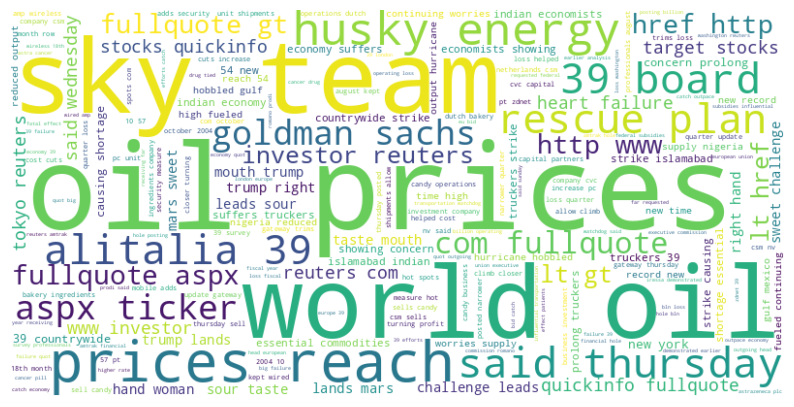

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df=0.01,
                        max_df=0.9,
                        max_features=1000,
                        stop_words='english',
                        use_idf=True, # the new piece
                        ngram_range=(2,2))

from wordcloud import WordCloud
import matplotlib.pyplot as plt

business_docs = dfs[dfs['label'] == 'business']['text']

tfidf_matrix = tfidf.fit_transform(business_docs)

tfidf_dict = dict(zip(tfidf.get_feature_names_out(), tfidf_matrix.sum(axis=0).tolist()[0]))

wordcloud = WordCloud(width=800, height=400, background_color='white')
wordcloud.generate_from_frequencies(tfidf_dict)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Supervised Feature Selection

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2


def word_count(doc):
    total = 0
    for token in doc:
        if not token.is_stop:
          total += 1
    return total
##TODO compute the number of words per document (excluding stopwords)

# Calculate ratios for each document
dfs['word_count'] = dfs['doc'].apply(word_count)

X = dfs['word_count']
y = dfs['label']

selector = SelectKBest(score_func=f_classif, k=5)
selector.fit_transform(X.values.reshape(-1,1), y)

f_classif_features = selector.get_feature_names_out()
print("Features selected with f_classif:")
print(f_classif_features)

# Feature selection using chi2
selector = SelectKBest(score_func=chi2, k=5)
selector.fit(X, y)

chi2_features = selector.get_feature_names_out()
print("Features selected with chi2:")
print(chi2_features)

Are the results different? What could be a reason for this?

## Huggingface Tokenizers

In [ ]:
!pip install transformers

In [ ]:
# # we use distilbert tokenizer
# !pip install transformers
from transformers import DistilBertTokenizerFast

# let's instantiate a tokenizer
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

def tokenize_and_calculate_stats(text):
    tokens = tokenizer(text, return_attention_mask=False)
    n_unique_types = len(tokenizer.vocab) # Number of unique token types
    n_tokens = len(tokens['input_ids'])  # Number of tokens
    type_token_ratio = n_unique_types/n_tokens  # Calculate the ratio

    return tokens, type_token_ratio  # Return two values

# Tokenize sentences and calculate stats
dfs['tokens'], dfs['type_token_ratio'] = dfs['text'].apply(tokenize_and_calculate_stats)

##TODO tokenize the sentences in the sampled dataframe (dfs) using the DisilBertTokenizer
##TODO what is the type/token ratio from this tokenizer (number_of_unqiue_token_types/number_of_tokens)?
##TODO what is the amount of subword tokens returned by the huggingface tokenizer? hint: each subword token starts with "#"
dfs


ValueError: too many values to unpack (expected 2)

# Parsing

In [ ]:
import pandas as pd
import nltk
df = pd.read_csv('train.csv')

df.columns = ["label", "title", "lead"]
label_map = {1:"world", 2:"sport", 3:"business", 4:"sci/tech"}
def replace_label(x):
	return label_map[x]
df["label"] = df["label"].apply(replace_label)
df["text"] = df["title"] + " " + df["lead"]
df = df.sample(n=10000) # # only use 10K datapoints
df.head()

,label,title,lead,text
110581,sport,UEFA to probe Valencia-Werder Bremen incidents,UEFA will be launching disciplinary proceeding...,UEFA to probe Valencia-Werder Bremen incidents...
15925,sci/tech,New iMac tries to play it cool,Hot G5 chip requires some serious effort to av...,New iMac tries to play it cool Hot G5 chip req...
46720,business,Ford Reports Disappointing U.S. Sales,Ford's car and truck business sales fell nearl...,Ford Reports Disappointing U.S. Sales Ford's c...
57350,sci/tech,Microsoft Upgrades Windows XP Media Center (Ne...,NewsFactor - Bill Gates is about to announce a...,Microsoft Upgrades Windows XP Media Center (Ne...
90601,sport,Rams make statement they #39;re team to beat i...,ST. LOUIS -- When St. Louis coach Mike Martz l...,Rams make statement they #39;re team to beat i...


In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')
#TODO preprocess the corpus using spacy


### Information Extraction

In [ ]:
def extract_subject_verb_pairs(sent):
    subjs = [w for w in sent if w.dep_ == "nsubj"]
    pairs = [(w.lemma_.lower(), w.head.lemma_.lower()) for w in subjs]
    return pairs
##TODO extract the subject-verbs pairs and print the result for the second document

from collections import Counter
counter = Counter()

##TODO create a list ranking the most common pairs and print the first 10 items

In [ ]:
##TODO do the same for verbs-object pairs ('dobj')
##TODO create a list ranking the most common pairs and print the first 10 items

In [ ]:
##TODO do the same for adjectives-nouns pairs ('amod')
##TODO create a list ranking the most common pairs and print the first 10 items

### Exploring cross label dependencies

In [ ]:
##TODO extract all the subject-verbs and verbs-object pairs for the verb "rise"

In [ ]:
##TODO for each label create a list ranking the most common subject-verbs pairs and one for the most common verbs-object pairs
##TODO print the 10 most common pairs for each of the two lists for the labels "world" and "sci/tech"